In [154]:
import pandas as pd
from const import URL_DATABASE
from utils import create_engine
from utils import df_plot_history
from const import STOCK_NAME
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
import pickle

In [155]:
dbEngine = create_engine(URL_DATABASE)
connection = dbEngine.connect()

In [156]:
df = pd.read_sql_table('wig', connection)
df['Data'] = pd.to_datetime(df['Data'])
del df['index']
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,1991-04-16,100.00,100.00,100.00,100.00,325.0
1,1991-04-23,95.70,95.70,95.70,95.70,5905.0
2,1991-04-30,93.50,93.50,93.50,93.50,7162.0
3,1991-05-14,92.90,92.90,92.90,92.90,18300.0
4,1991-05-21,95.50,95.50,95.50,95.50,14750.0
...,...,...,...,...,...,...
7476,2022-12-22,1786.63,1796.05,1774.71,1780.07,10579489.0
7477,2022-12-23,1778.58,1782.76,1769.41,1780.27,8034718.0
7478,2022-12-27,1788.67,1792.82,1762.64,1765.87,6876220.0
7479,2022-12-28,1764.30,1776.98,1757.71,1767.88,10436182.0


In [157]:
x = df['Data']
y = df.loc[:,['Zamkniecie']]
y

,Zamkniecie
0,100.00
1,95.70
2,93.50
3,92.90
4,95.50
...,...
7476,1780.07
7477,1780.27
7478,1765.87
7479,1767.88


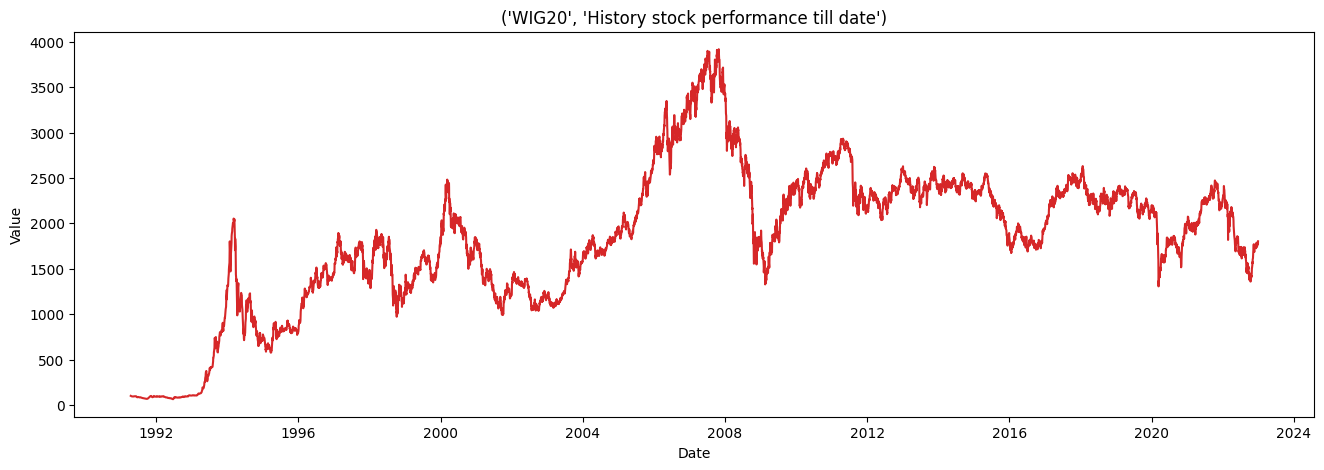

In [158]:
title = (STOCK_NAME, "History stock performance till date")
df_plot_history(x, y, title=title, xlabel='Date', ylabel='Value', dpi=100)

In [159]:
year = df['Data'].dt.year
month = df['Data'].dt.month
day = df['Data'].dt.day
df['year'] = year.astype(int)
df['month'] = month.astype(int)
df['day'] = day.astype(int)

df.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,year,month,day
0,1991-04-16,100.0,100.0,100.0,100.0,325.0,1991,4,16
1,1991-04-23,95.7,95.7,95.7,95.7,5905.0,1991,4,23
2,1991-04-30,93.5,93.5,93.5,93.5,7162.0,1991,4,30
3,1991-05-14,92.9,92.9,92.9,92.9,18300.0,1991,5,14
4,1991-05-21,95.5,95.5,95.5,95.5,14750.0,1991,5,21


In [160]:
df.dtypes

Data          datetime64[ns]
Otwarcie             float64
Najwyzszy            float64
Najnizszy            float64
Zamkniecie           float64
Wolumen              float64
year                   int32
month                  int32
day                    int32
dtype: object

In [161]:
df.columns

Index(['Data', 'Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen',
       'year', 'month', 'day'],
      dtype='object')

In [162]:
x = df[['year', 'month', 'day', 'Otwarcie', 'Najwyzszy', 'Najnizszy', 'Wolumen','Zamkniecie']]
y = df['Zamkniecie'].shift(-1)
y = y[:-1]
x = x[:-1]
x.dtypes

year            int32
month           int32
day             int32
Otwarcie      float64
Najwyzszy     float64
Najnizszy     float64
Wolumen       float64
Zamkniecie    float64
dtype: object

In [163]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.7, shuffle=False, random_state=0)

In [164]:
regression = LinearRegression()
regression.fit(train_x.values, train_y.values)
print("regression coefficient", regression.coef_)
print("regression intercept", regression.intercept_)

regression coefficient [-1.28362270e-01 -5.55845730e-02 -1.33123535e-01 -1.35300944e-01
  2.09464655e-01  4.39898175e-02  5.84991946e-07  8.76255296e-01]
regression intercept 262.6652653040387


In [165]:
regression_confidence = regression.score(test_x.values, test_y.values)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9959911023369954


In [166]:
predicted=regression.predict(test_x.values)
print(test_x.head())

      year  month  day  Otwarcie  Najwyzszy  Najnizszy    Wolumen  Zamkniecie
2244  2002      1   31   1428.63    1445.23    1425.77  3336306.0     1445.23
2245  2002      2    1   1454.33    1470.07    1419.58  5979843.0     1427.72
2246  2002      2    4   1405.81    1415.13    1397.61  3981418.0     1401.43
2247  2002      2    5   1383.54    1385.94    1362.99  5992996.0     1371.98
2248  2002      2    6   1377.62    1386.12    1359.83  5959393.0     1382.04


In [167]:
dfr = pd.DataFrame({'Actual_Price': test_y, 'Predicted_Price': predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
2244,1427.72,1441.992716
2245,1401.43,1433.587626
2246,1371.98,1403.072799
2247,1382.04,1373.686665
2248,1362.59,1383.048690
2249,1369.84,1365.296141
2250,1379.69,1372.522830
2251,1367.04,1381.388780
2252,1385.44,1369.365777
2253,1377.94,1384.535701


In [168]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 24.62390723103631
Mean Squared Error (MSE) : 1196.2357465027244
Root Mean Squared Error (RMSE): 34.58664115670564


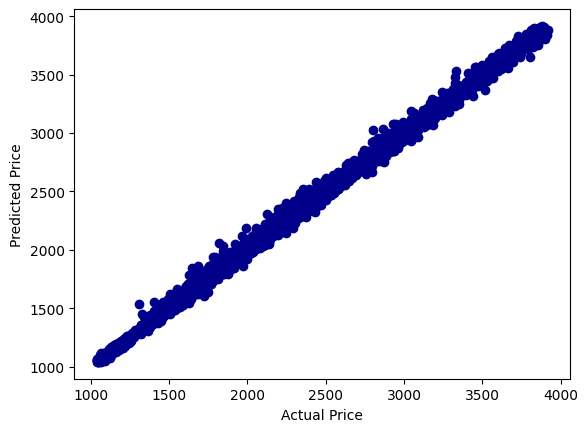

In [169]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price, color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


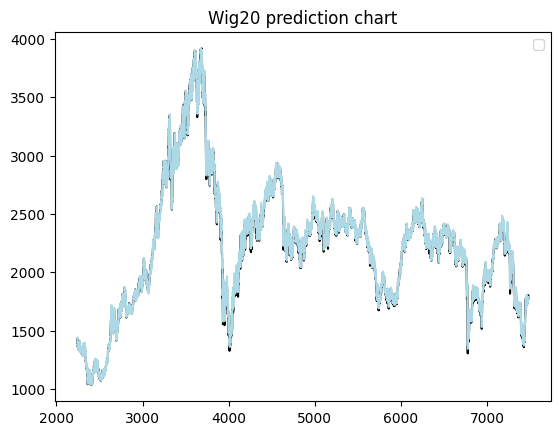

In [170]:
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='lightblue')
plt.title("Wig20 prediction chart")
plt.legend();

In [171]:
NNPickle = open('Reg', 'wb')
pickle.dump(regression, NNPickle)
NNPickle.close()